In [1]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

from pylab import rcParams
rcParams['figure.figsize'] = 25, 10

In [2]:
data_original = np.load('images_male.npy')
mean = np.mean(data_original,axis=0)
data = np.reshape(data_original - mean,data_original.shape)
# # print(data_original.shape)
# cov = np.cov(data,rowvar=False)
# # print(cov.shape)

In [10]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(data.T)

In [11]:
projection = np.matmul(principalComponents,principalComponents.T)

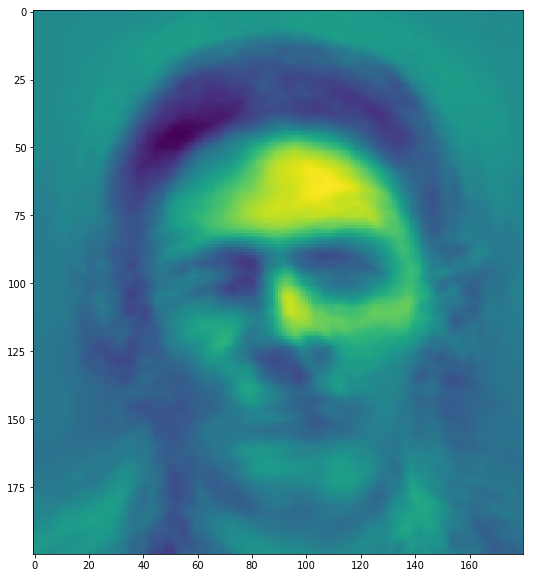

In [12]:
sample = cv2.normalize(cv2.imread('sample.jpg',0), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).flatten()
sample_array = np.reshape(sample,(1,36000))
projected = np.matmul(sample_array,projection)*255.0
recon_image = np.reshape(projected,(200,180))
plt.imshow(recon_image)

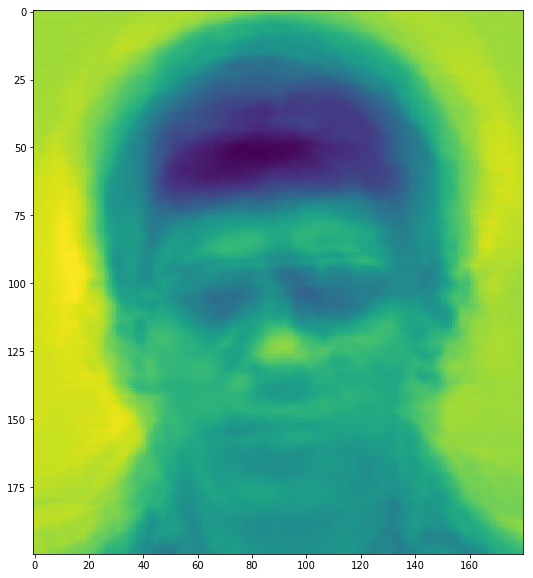

In [20]:
sample = cv2.normalize(cv2.imread('sample2.jpg',0), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).flatten()
sample_array = np.reshape(sample,(1,36000))
projected = np.matmul(sample_array,projection)*255.0
recon_image = np.reshape(projected,(200,180))
plt.imshow(recon_image)